In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
chd = pd.read_csv('./drive/My Drive/Datasets/chd_data.csv')
chd.describe()

,age,chd
count,100.000000,100.00000
mean,44.380000,0.43000
std,11.721327,0.49757
min,20.000000,0.00000
25%,34.750000,0.00000
50%,44.000000,0.00000
75%,55.000000,1.00000
max,69.000000,1.00000


In [62]:
chd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     100 non-null    int64
 1   chd     100 non-null    int64
dtypes: int64(2)
memory usage: 1.7 KB


In [63]:
chd.head()

,age,chd
0,20,0
1,23,0
2,24,0
3,25,1
4,25,0


Text(0.5, 1.0, 'Age vs CHD')

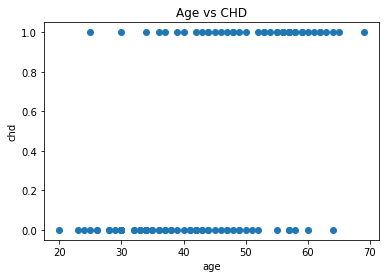

In [64]:
plt.scatter('age', 'chd', data=chd)
plt.xlabel('age')
plt.ylabel('chd')
plt.title('Age vs CHD')

In [65]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()  
features = ["age"]
target = ["chd"]
model.fit(chd[features], chd[target])
print("Intercept : ", model.intercept_, "\nCoefficients : ", model.coef_)

Intercept :  [-5.30653265] 
Coefficients :  [[0.1108579]]


In [66]:
data = np.array(40)
print(model.predict(data.reshape(-1,1)))

[0]


In [67]:
model.predict_proba(data.reshape(-1, 1))

array([[0.70520671, 0.29479329]])

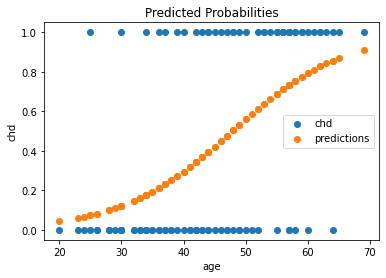

In [68]:
chd['predictions'] = model.predict_proba(chd[features])[:,1]
plt.scatter('age', 'chd', data = chd)
plt.scatter('age', 'predictions', data = chd)
plt.xlabel('age')
plt.ylabel('chd')
plt.title('Predicted Probabilities')
plt.legend()

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [70]:
credit_data = pd.read_csv('./drive/My Drive/Datasets/credit_risk.csv')
credit_data.head()

,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,other_parties,residence_since,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,4,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,2,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,3,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,4,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,4,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [0]:
features = credit_data.columns.drop('class')
target = ['class']

In [72]:
credit_data_encoded = pd.get_dummies(credit_data)
# credit_data_encoded['class'] = credit_data['class']
credit_data_encoded.columns

Index(['credit_usage', 'current_balance', 'location', 'residence_since',
       'cc_age', 'existing_credits', 'num_dependents', 'over_draft_0<=X<200',
       'over_draft_<0', 'over_draft_>=200', 'over_draft_no checking',
       'credit_history_all paid',
       'credit_history_critical/other existing credit',
       'credit_history_delayed previously', 'credit_history_existing paid',
       'credit_history_no credits/all paid', 'purpose_business',
       'purpose_domestic appliance', 'purpose_education',
       'purpose_furniture/equipment', 'purpose_new car', 'purpose_other',
       'purpose_radio/tv', 'purpose_repairs', 'purpose_retraining',
       'purpose_used car', 'Average_Credit_Balance_100<=X<500',
       'Average_Credit_Balance_500<=X<1000', 'Average_Credit_Balance_<100',
       'Average_Credit_Balance_>=1000',
       'Average_Credit_Balance_no known savings', 'employment_1<=X<4',
       'employment_4<=X<7', 'employment_<1', 'employment_>=7',
       'employment_unemployed', 'p

In [73]:
from sklearn.model_selection import train_test_split
credit_train, credit_test = train_test_split(credit_data_encoded, test_size = 0.15)
credit_train.shape, credit_test.shape

((850, 63), (150, 63))

In [74]:
from sklearn.linear_model import LinearRegression
features = credit_train.columns.drop(['class_bad', 'class_good'])
target = ['class_bad', 'class_good']
model = LinearRegression()
model.fit(credit_train[features], credit_train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
train_accuracy = model.score(credit_train[features], credit_train[target])
test_accuracy = model.score(credit_test[features], credit_test[target])
print(train_accuracy, test_accuracy)

0.27522220021446325 0.2653079041228348


In [76]:
model.predict(credit_train[features])

array([[0.20587193, 0.79412807],
       [0.6491494 , 0.3508506 ],
       [0.96070557, 0.03929443],
       ...,
       [0.28881225, 0.71118775],
       [0.50352904, 0.49647096],
       [0.17046212, 0.82953788]])

In [78]:
credit_data.head()

,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,other_parties,residence_since,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,4,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,2,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,3,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,4,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,4,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [79]:
default = pd.read_csv('./drive/My Drive/Datasets/default.csv')
default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10000 non-null  int64  
 1   default     10000 non-null  object 
 2   student     10000 non-null  object 
 3   balance     10000 non-null  float64
 4   income      10000 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 390.8+ KB


In [80]:
default_subset = pd.read_csv('./drive/My Drive/Datasets/default_subset.csv')
default_subset

,default,student,balance,income
0,No,Yes,817.1804,12106.14
1,Yes,Yes,1486.9980,17854.40
2,Yes,Yes,1102.4350,17391.78
3,Yes,Yes,1233.4460,12586.48
4,Yes,Yes,1276.6850,19282.44
5,Yes,Yes,1289.2460,13624.55
6,No,Yes,673.8124,17672.29
7,No,No,870.4124,17685.45
8,No,Yes,903.1768,15810.57
9,No,Yes,879.6270,14898.31


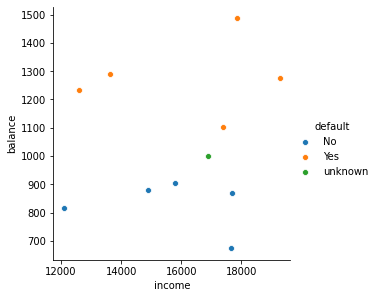

In [81]:
import seaborn as sns
sns.pairplot(default_subset, hue='default', x_vars='income', y_vars='balance', size=4)

In [82]:
x1 = default_subset.loc[0,['balance', 'income']]
x2 = default_subset.loc[1, ['balance', 'income']]
np.linalg.norm(x1-x2)

5787.1537602581275

In [83]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(default_subset[['balance', 'income']])
default_subset['norm_balance'] = scaled_values[:,0]
default_subset['norm_income'] = scaled_values[:, 1]
default_subset

,default,student,balance,income,norm_balance,norm_income
0,No,Yes,817.1804,12106.14,0.176304,0.000000
1,Yes,Yes,1486.9980,17854.40,1.000000,0.801006
2,Yes,Yes,1102.4350,17391.78,0.527091,0.736541
3,Yes,Yes,1233.4460,12586.48,0.688199,0.066934
4,Yes,Yes,1276.6850,19282.44,0.741371,1.000000
5,Yes,Yes,1289.2460,13624.55,0.756818,0.211587
6,No,Yes,673.8124,17672.29,0.000000,0.775630
7,No,No,870.4124,17685.45,0.241765,0.777463
8,No,Yes,903.1768,15810.57,0.282057,0.516203
9,No,Yes,879.6270,14898.31,0.253097,0.389082


In [85]:
x1_n = default_subset.loc[0,['norm_balance', 'norm_income']]
x2_n = default_subset.loc[1, ['norm_balance', 'norm_income']]
np.linalg.norm(x1_n - x2_n)

1.1489497815843785

In [87]:
x11 = default_subset.loc[10, ['norm_balance', 'norm_income']]
dist_to_x11 = lambda x : np.linalg.norm(x-x11)
default_subset['dist_toX11'] = default_subset[['norm_balance', 'norm_income']].apply(dist_to_x11, axis = 1)
default_subset.sort_values('dist_toX11')

,default,student,balance,income,norm_balance,norm_income,dist_toX11
10,unknown,Yes,1000.0000,16900.00,0.401123,0.668013,0.000000
2,Yes,Yes,1102.4350,17391.78,0.527091,0.736541,0.143401
8,No,Yes,903.1768,15810.57,0.282057,0.516203,0.192932
7,No,No,870.4124,17685.45,0.241765,0.777463,0.193325
9,No,Yes,879.6270,14898.31,0.253097,0.389082,0.315775
6,No,Yes,673.8124,17672.29,0.000000,0.775630,0.415309
4,Yes,Yes,1276.6850,19282.44,0.741371,1.000000,0.475378
5,Yes,Yes,1289.2460,13624.55,0.756818,0.211587,0.578657
1,Yes,Yes,1486.9980,17854.40,1.000000,0.801006,0.613466
3,Yes,Yes,1233.4460,12586.48,0.688199,0.066934,0.666114


In [91]:
features_to_scale = ['balance', 'income']
scaled_values = scaler.fit_transform(default[features_to_scale])
default['norm_balance'] = scaled_values[:,0]
default['norm_income'] =  scaled_values[:,1]
default.head()

,Unnamed: 0,default,student,balance,income,norm_balance,norm_income
0,1,No,No,729.526495,44361.625074,0.274845,0.598905
1,2,No,Yes,817.180407,12106.134700,0.307868,0.155727
2,3,No,No,1073.549164,31767.138947,0.404453,0.425862
3,4,No,No,529.250605,35704.493935,0.199392,0.479959
4,5,No,No,785.655883,38463.495879,0.295991,0.517867


In [92]:
default_train, default_test = train_test_split(default, test_size = 0.2, random_state=100)
default_train.shape, default_test.shape

((8000, 7), (2000, 7))

In [93]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3, metric = 'euclidean')
features = ['norm_balance', 'norm_income']
target = ['default']
model.fit(default_train[features], default_train[target])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [94]:
train_accuracy = model.score(default_train[features], default_train[target])
test_accuracy = model.score(default_test[features], default_test[target])
print(train_accuracy, test_accuracy)

0.977375 0.967


In [95]:
iris_data = pd.read_csv('./drive/My Drive/Datasets/iris.csv')
iris_data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
